<a href="https://www.kaggle.com/code/saralouislofmen/economic-data-analysis-fred-python?scriptVersionId=157450606" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

!pip install fredapi

  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/96/d4/f81fa9f67775a6a4b9e2cd8487239d61a9698cb2b9c02a5a2897d310f7a4/fredapi-0.5.1-py3-none-any.whl.metadata


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred-api")


In [3]:
#Create FRED OBJ

fred = Fred(api_key=fred_key)


In [4]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-02,2024-01-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-12-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-02 11:33:02-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-02,2024-01-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-01-02,2024-01-02,S&P 500,2013-12-30,2023-12-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-12-29 19:11:01-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-01-02,2024-01-02,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-02,2024-01-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-12-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-02 11:33:05-06:00,81,This data represents the effective yield of th...


Pull Raw Data & Plot it

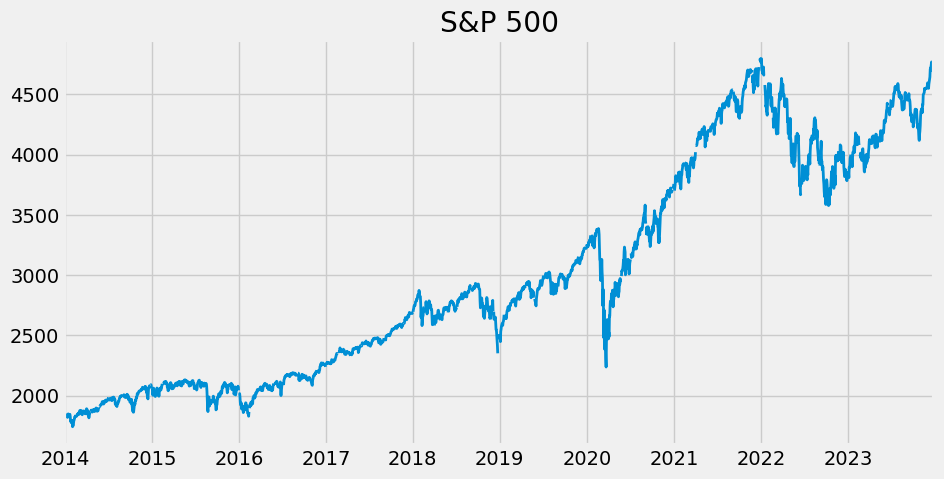

In [5]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

Pull and Plot Unemployment Data

In [6]:
unemp_df = fred.search('unemployment')
unemp_df.head(25)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-01-02,2024-01-02,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:02-06:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-01-02,2024-01-02,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-12-08 07:49:02-06:00,54,The unemployment rate represents the number of...
CCSA,CCSA,2024-01-02,2024-01-02,Continued Claims (Insured Unemployment),1967-01-07,2023-12-16,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-12-28 07:39:04-06:00,74,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2024-01-02,2024-01-02,Continued Claims (Insured Unemployment),1967-01-07,2023-12-16,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-12-28 07:39:08-06:00,35,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2024-01-02,2024-01-02,Unemployment Level,1948-01-01,2023-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-12-08 07:50:04-06:00,65,The series comes from the 'Current Population ...
NROU,NROU,2024-01-02,2024-01-02,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,62,"Starting with the July, 2021 report: An Update..."
LNS14000006,LNS14000006,2024-01-02,2024-01-02,Unemployment Rate - Black or African American,1972-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:05-06:00,66,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-01-02,2024-01-02,Unemployment Rate - Black or African American,1972-01-01,2023-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-12-08 07:49:07-06:00,16,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2024-01-02,2024-01-02,Unemployment Level,1948-01-01,2023-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2023-12-08 07:50:25-06:00,15,The series comes from the 'Current Population ...


In [7]:
unrate = fred.get_series('UNRATE')
unrate.head(10)

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
1948-06-01    3.6
1948-07-01    3.6
1948-08-01    3.9
1948-09-01    3.8
1948-10-01    3.7
dtype: float64

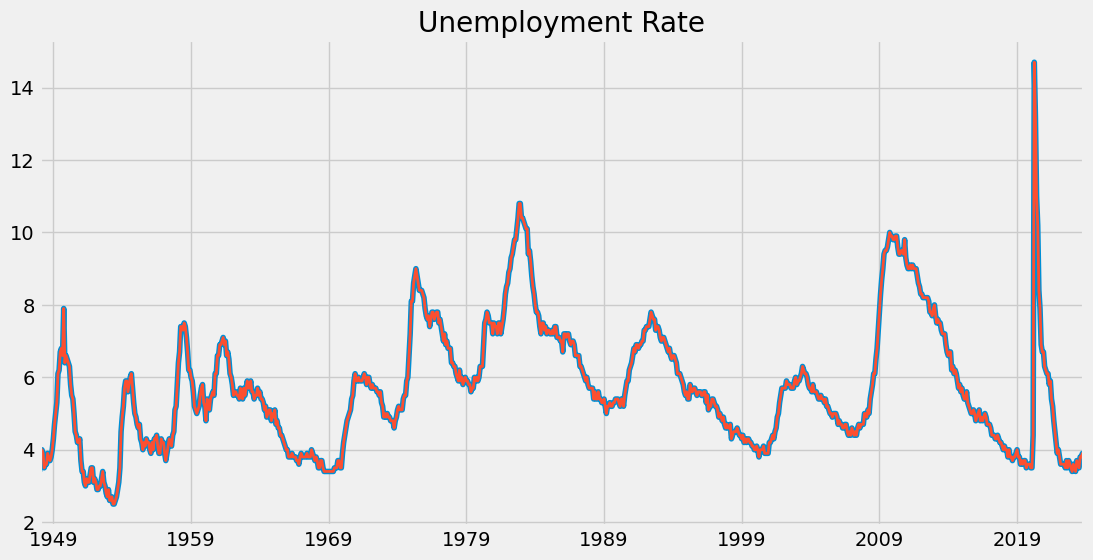

In [8]:
unrate.plot()
unrate.plot(figsize=(12, 6), title='Unemployment Rate', lw=2)
plt.show()

In [9]:
fred.search('unemployment state')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-01-02,2024-01-02,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:02-06:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-01-02,2024-01-02,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-12-08 07:49:02-06:00,54,The unemployment rate represents the number of...
CCSA,CCSA,2024-01-02,2024-01-02,Continued Claims (Insured Unemployment),1967-01-07,2023-12-16,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-12-28 07:39:04-06:00,74,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2024-01-02,2024-01-02,Continued Claims (Insured Unemployment),1967-01-07,2023-12-16,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-12-28 07:39:08-06:00,35,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2024-01-02,2024-01-02,Unemployment Level,1948-01-01,2023-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-12-08 07:50:04-06:00,65,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN170150000000004,LAUCN170150000000004,2024-01-02,2024-01-02,"Unemployed Persons in Carroll County, IL",1990-01-01,2023-10-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-11-30 10:15:06-06:00,3,These data come from the Current Population Su...
LAUCN190610000000004,LAUCN190610000000004,2024-01-02,2024-01-02,"Unemployed Persons in Dubuque County, IA",1990-01-01,2023-10-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-11-30 10:23:06-06:00,3,These data come from the Current Population Su...
LAUCN191790000000004,LAUCN191790000000004,2024-01-02,2024-01-02,"Unemployed Persons in Wapello County, IA",1990-01-01,2023-10-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-11-30 10:22:07-06:00,3,These data come from the Current Population Su...


In [10]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [11]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
    

    uemp_results = pd.concat(all_results, axis=1)


In [12]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [13]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [14]:
px.line(uemp_states)